# Лабораторная работа №1

## Задание на лабораторную работу.

Разработать программу генерирующую набор данных, удовлетворяющих условию
варианта. Для всех вариантов: данные двумерные (используются только два признака).
Классификатор – логистическая регрессия (информация в методичке). Разбиение выборки
50%/50% (половина данных используется для обучения классификатора, половина для
оценки ошибки классификации).

## Результаты, которые необходимо получить в итоге:
1. Параметры генерации данных.
2. Графическое представления расположения набора данных (двумерный график, в
котором каждый класс обозначен своим цветом).
3. Матрицу ошибок.
4. Значение точности классификации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

RAND=7

In [2]:
N, M, R1, R2 = 7, 722*7, .586, .6

In [3]:
X, y = make_blobs(
    n_samples=M, 
    centers=N, 
    n_features=2,
    cluster_std = 1.85,
    random_state=RAND
)
 
columns = {
    'first_feature': X[:, 0], 
    'second_feature': X[:, 1], 
    'target_value': y
}

df = pd.DataFrame(data=columns)

In [4]:
df.head()

,first_feature,second_feature,target_value
0,-3.215031,-12.658620,6
1,1.953394,6.279312,1
2,1.574853,8.359959,5
3,14.473968,-0.218425,2
4,9.983138,-3.442013,2


In [5]:
print(f"Размерность данных: {df.shape}")

Размерность данных: (5054, 3)


In [6]:
print(f"Количество элементов в каждом классе:\n{df['target_value'].value_counts().sort_values()}")

Количество элементов в каждом классе:
6    722
1    722
5    722
2    722
0    722
3    722
4    722
Name: target_value, dtype: int64


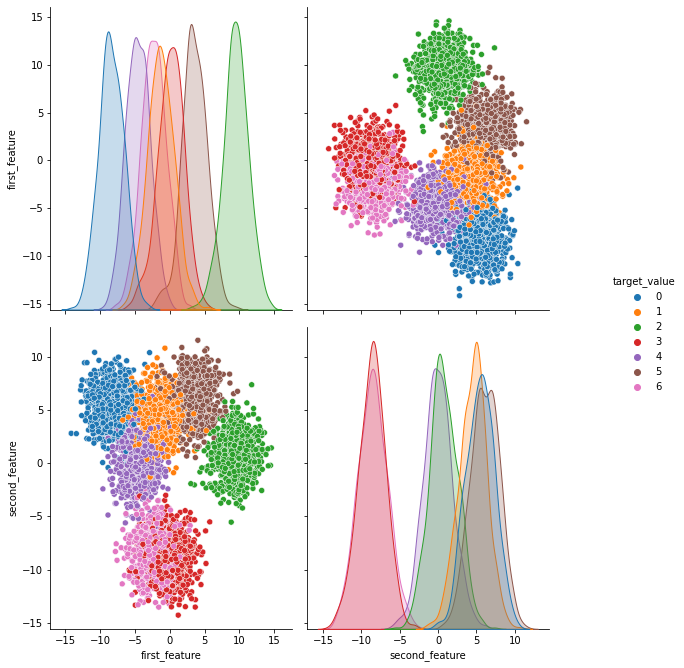

In [7]:
g = sns.pairplot(df, hue='target_value', palette="tab10")
g.fig.set_size_inches(10,10)

In [8]:
X = df.drop("target_value", axis=1)
y = df["target_value"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=RAND)

In [10]:
clf = LogisticRegression(penalty="l2", solver="newton-cg", C=1.0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       356
           1       0.80      0.87      0.83       364
           2       0.99      0.98      0.98       364
           3       0.76      0.70      0.73       368
           4       0.89      0.89      0.89       357
           5       0.92      0.88      0.90       359
           6       0.71      0.77      0.74       359

    accuracy                           0.86      2527
   macro avg       0.86      0.86      0.86      2527
weighted avg       0.86      0.86      0.86      2527



In [12]:
confusion_matrix(y_test, predictions)

array([[331,  11,   0,   0,  14,   0,   0],
       [  6, 315,   0,   0,  22,  21,   0],
       [  0,   0, 355,   2,   0,   7,   0],
       [  0,   0,   1, 258,   0,   0, 109],
       [  9,  26,   0,   0, 319,   0,   3],
       [  0,  43,   1,   0,   0, 315,   0],
       [  0,   0,   0,  78,   4,   0, 277]])

<AxesSubplot:>

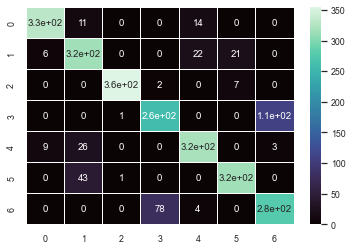

In [13]:
sns.set(font_scale=0.8)
sns.heatmap(confusion_matrix(y_test, predictions), linewidths=.5, cmap="mako", annot=True)

In [14]:
print(f"Диапазон точности: {R1}-{R2}")
print(f"Точность модели: {accuracy_score(y_test, predictions)}")

Диапазон точности: 0.586-0.6
Точность модели: 0.8587257617728532
